# Clasificador mediante regresión logística y una función discriminante polinomial

Accuracy: 0.9666666666666667


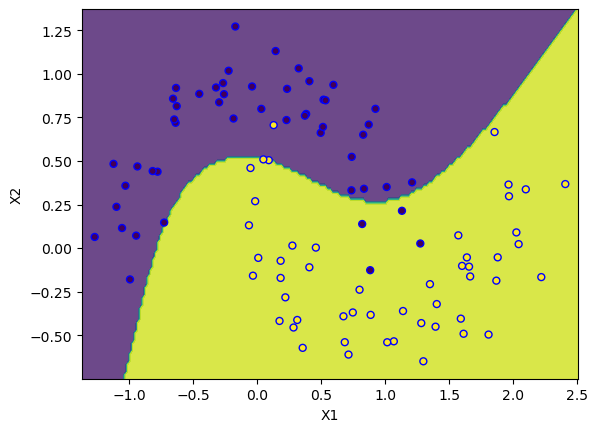

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#generar datos sintéticos
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
#dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#crear un pipeline con un modelo de regresión logística con kernel polinomial
model = make_pipeline(PolynomialFeatures(degree=3), LogisticRegression())
#entrenar el modelo
model.fit(X_train, y_train)
#realizar predicciones
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

#visualizar la frontera de decisión
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='blue', s=25)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

plot_decision_boundary(model, X, y)